## 06_Create_Features_CollectionData

Author: Daniel Hui

License: MIT

This notebook takes the Collection data set and creates features for each unique book in the Seattle collection

### Create Features from CollectionData

In [54]:
import pandas as pd
import numpy as np

In [55]:
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [104]:
inventory_df = pd.read_csv('../01_Data/03_Cleaned/Library_Collection_Inventory_jan_2018_clean.csv',index_col=0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Feature: Each Book: Available at How Many Branch Locations? 

In [131]:
location_count_df = inventory_df.groupby(["BibNum","ItemLocation"]).count()       #each book: unique locations 
location_count_df = location_count_df.reset_index()[["BibNum","ItemLocation"]]    #reset to DF and cut out cols
location_count_df = location_count_df.groupby(["BibNum"]).count().sort_values(by="ItemLocation",ascending=False).reset_index()
location_count_df = location_count_df.rename({"ItemLocation":"Branches"},axis=1)

In [132]:
location_count_df.head()

,BibNum,Branches
0,2609423,27
1,3313042,27
2,3297286,27
3,15661,27
4,2772449,27


In [133]:
location_count_df.tail()

,BibNum,Branches
397142,2113902,1
397143,2113900,1
397144,2113898,1
397145,2113895,1
397146,2554562,1


### EDA: Books vs. Total Location Count

In [108]:
#books by # of locations
totlocation_list = []
for i in range (1, inventory_df["ItemLocation"].nunique()+1):
    books = len(location_count_df[location_count_df["ItemLocation"]==i])   #the # of books at i locations
    totlocation_list.append((i,books))

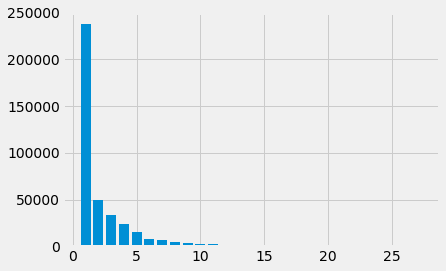

In [109]:
locations, books = zip(*totlocation_list)
plt.bar(locations, books);

In [110]:
len(location_count_df[location_count_df["ItemLocation"]>5])   #number of books available at more than 5 branches

37953

### Feature: Each Book: How Many Copies in the Collection?

In [134]:
inventory_count_df = inventory_df[["BibNum","ItemCount"]]
inventory_count_df = inventory_count_df.groupby(["BibNum"]).sum().reset_index()
inventory_count_df = inventory_count_df.sort_values(by="ItemCount",ascending=False)
inventory_count_df = inventory_count_df.rename({"ItemCount":"Copies"},axis=1)

In [135]:
inventory_count_df.head()

,BibNum,Copies
387429,3282303,290
251253,2748046,288
376196,3244267,282
386313,3279373,260
385315,3277792,259
